## Q1: Nominal, Ordinal, Ratio, Interval
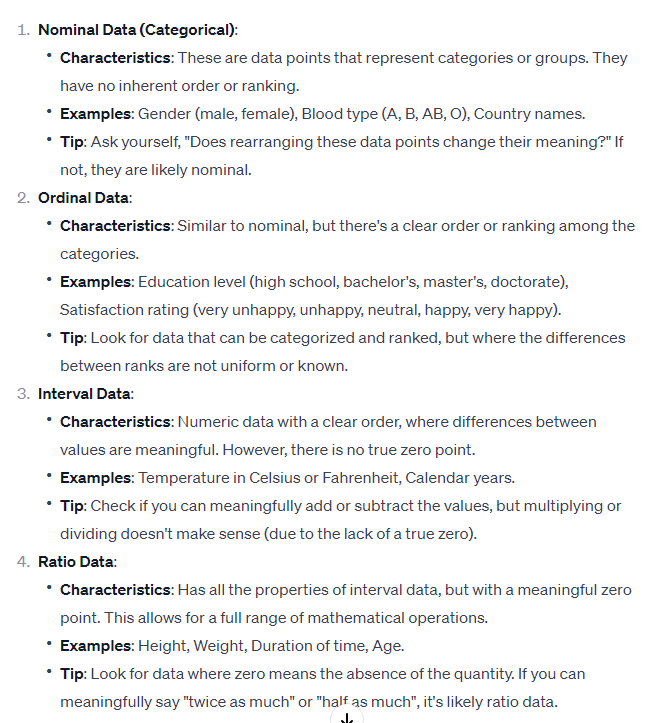

## Q2: Median, StdDev, Quartiles from Histogram
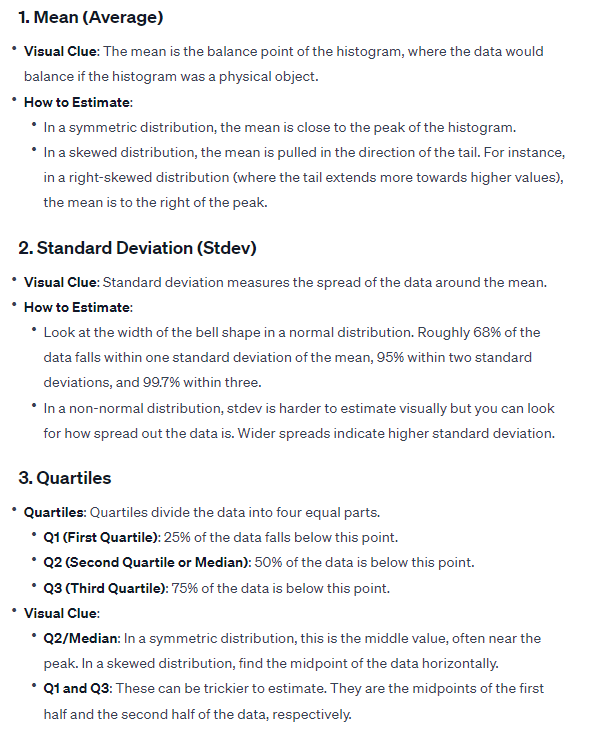

## Q: KNN - Leav one out cross validation - Error rate

In [2]:
import numpy as np

# Distance matrix for the 10 observations
distances = np.array([
    [0.0, 1.7, 1.4, 0.4, 2.2, 3.7, 5.2, 0.2, 4.3, 6.8, 6.0],
    [1.7, 0. , 1. , 2. , 1.3, 2.6, 4.5, 1.8, 3.2, 5.9, 5.2],
    [1.4, 1. , 0. , 1.7, 0.9, 2.4, 4.1, 1.5, 3. , 5.5, 4.8],
    [0.4, 2. , 1.7, 0. , 2.6, 4. , 5.5, 0.3, 4.6, 7.1, 6.3],
    [2.2, 1.3, 0.9, 2.6, 0. , 1.7, 3.4, 2.4, 2.1, 4.8, 4.1],
    [3.7, 2.6, 2.4, 4. , 1.7, 0. , 2. , 3.8, 1.6, 3.3, 2.7],
    [5.2, 4.5, 4.1, 5.5, 3.4, 2. , 0. , 5.4, 2.5, 1.6, 0.9],
    [0.2, 1.8, 1.5, 0.3, 2.4, 3.8, 5.4, 0. , 4.4, 6.9, 6.1],
    [4.3, 3.2, 3. , 4.6, 2.1, 1.6, 2.5, 4.4, 0. , 3.4, 2.9],
    [6.8, 5.9, 5.5, 7.1, 4.8, 3.3, 1.6, 6.9, 3.4, 0. , 1. ],
    [6. , 5.2, 4.8, 6.3, 4.1, 2.7, 0.9, 6.1, 2.9, 1. , 0. ]
])

# Class labels for the observations
# Assuming C1 = poor rating, C2 = average rating, C3 = high rating
class_labels = np.array(['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2'])

# Leave-One-Out Cross Validation for KNN
k = 1
errors = 0

# Iterate over each observation
for i in range(len(distances)):
    # Create a mask to exclude the current observation
    mask = np.ones(len(distances), dtype=bool)
    mask[i] = False

    # Get the distances and labels for the remaining observations
    distances_without_i = distances[i, mask]
    labels_without_i = class_labels[mask]

    # Find the indices of the k-nearest neighbors (excluding the current observation)
    neighbor_indices = np.argsort(distances_without_i)[:k]
    
    # Get the classes of the k-nearest neighbors
    neighbor_classes = labels_without_i[neighbor_indices]
    
    # Determine the most common class among the neighbors
    unique, counts = np.unique(neighbor_classes, return_counts=True)
    neighbor_class_counts = dict(zip(unique, counts))
    
    # Tie-breaking rule: choose the class of the closest neighbor among the tied classes
    if len(unique[counts == counts.max()]) > 1:  # There's a tie
        # Sort neighbors by distance and take the class of the closest one
        sorted_neighbors_by_distance = labels_without_i[np.argsort(distances_without_i)]
        for label in sorted_neighbors_by_distance:
            if label in unique[counts == counts.max()]:
                predicted_class = label
                break
    else:
        # No tie, take the most common class
        predicted_class = unique[counts.argmax()]
    
    # Increment the error count if the prediction is wrong
    if predicted_class != class_labels[i]:
        errors += 1

# Calculate the error rate
error_rate = errors / len(distances)

error_rate


0.36363636363636365

## Q13: Number of models - Nueral network - cross validation - K1, K2
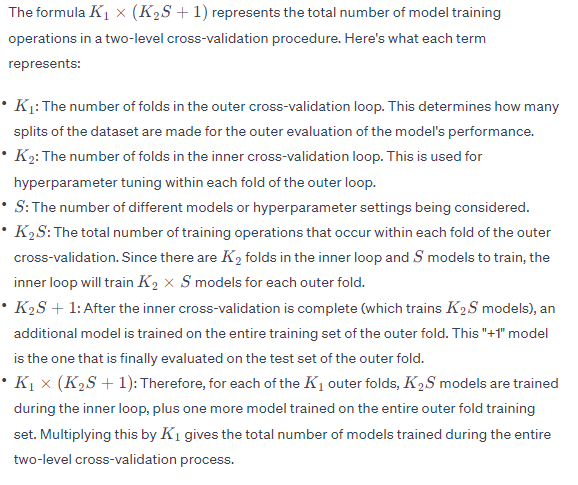

In [3]:
# Constants for the nested cross-validation
K1 = 4  # Number of outer folds
K2 = 7  # Number of inner folds
S = 3   # Number of different model architectures

# Calculating the total number of training operations
total_train_operations = K1 * (K2 * S + 1)

# Displaying the total number of training operations
total_train_operations


88

## Three level cross validation - K1, K2, K3 
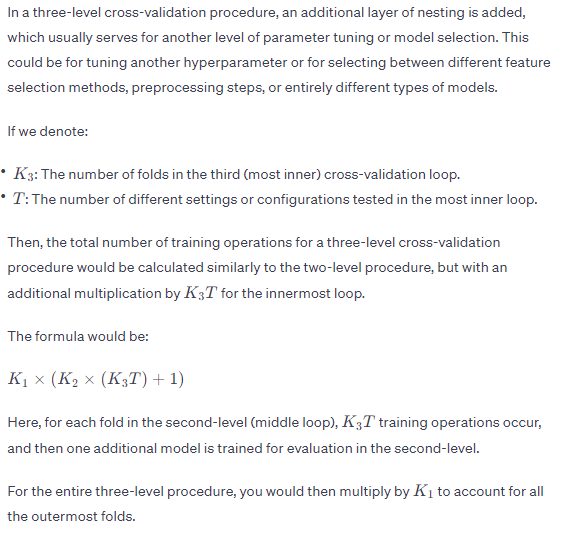

In [4]:
# Constants for the three-level nested cross-validation
K1 = 4  # Number of outer folds
K2 = 7  # Number of middle folds
K3 = 5  # Number of innermost folds
T = 2   # Number of configurations in the innermost loop

# Calculating the total number of training operations
total_train_operations_three_level = K1 * (K2 * (K3 * T) + 1)

# Displaying the total number of training operations for three-level cross-validation
total_train_operations_three_level


284

## Q16: Probability - Naive Bayes - with regularization factor - Special
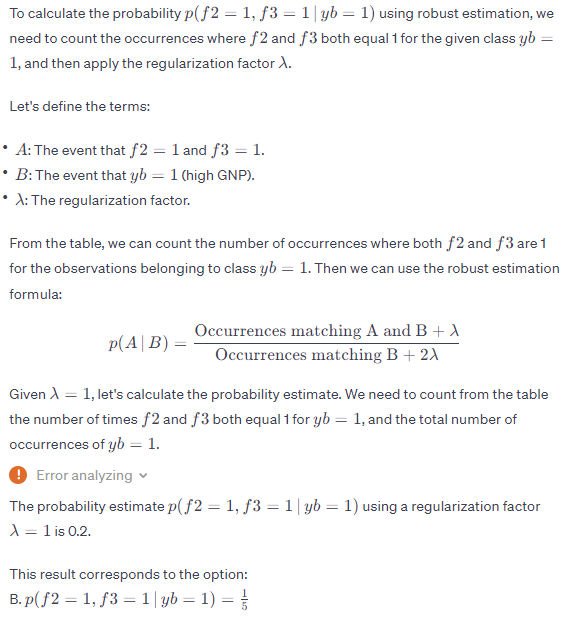

In [11]:
import numpy as np

# Given data
binarized_data = np.array([
    [1, 1, 1, 0, 0],  # o1
    [1, 1, 1, 0, 0],  # o2
    [1, 1, 1, 0, 0],  # o3
    [1, 1, 1, 0, 0],  # o4
    [1, 1, 1, 0, 0],  # o5
    [0, 1, 1, 0, 0],  # o6
    [0, 1, 0, 1, 1],  # o7
    [1, 1, 1, 0, 0],  # o8
    [1, 0, 1, 0, 0],  # o9
    [0, 0, 0, 1, 1],  # o10
    [0, 1, 0, 1, 1]   # o11
])

# High GNP class (yb = 1) corresponds to observations o9, o10, o11
high_GNP_observations = binarized_data[8:11, :]
low_GNP_observations = binarized_data[0:8, :]


# Count the occurrences where f2 and f3 both equal 1 for the high GNP class
occurrences_A_and_B = np.sum((high_GNP_observations[:, 1] == 1) & (high_GNP_observations[:, 2] == 1))

# Count the total occurrences of the high GNP class (yb = 1)
occurrences_B = len(high_GNP_observations)

# Regularization factor
lambda_factor = 1

# Calculate the probability with robust estimation
probability_estimate = (occurrences_A_and_B + lambda_factor) / (occurrences_B + 2 * lambda_factor)
probability_estimate


0.2

## Q18: Purity Gain - Gini Impurity

In [1]:
import numpy as np

# Data in binary matrix form where each row is an observation and each column is a feature
data = np.array([
    [1, 1, 1, 0, 0],  # o1
    [1, 1, 1, 0, 0],  # o2
    [1, 1, 1, 0, 0],  # o3
    [1, 1, 1, 0, 0],  # o4
    [1, 1, 1, 0, 0],  # o5
    [0, 1, 1, 0, 0],  # o6
    [0, 1, 0, 1, 1],  # o7
    [1, 1, 1, 0, 0],  # o8
    [1, 0, 1, 0, 0],  # o9
    [0, 0, 0, 1, 1],  # o10
    [0, 1, 0, 1, 1]   # o11
])

# Class labels for the observations
classes = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])  # 0 for C1, 1 for C2, 2 for C3

# Function to calculate Gini impurity
def gini_impurity(class_labels):
    unique, counts = np.unique(class_labels, return_counts=True)
    probabilities = counts / counts.sum()
    impurity = 1 - np.sum(probabilities**2)
    return impurity

# Calculate Gini impurity for the root node
root_impurity = gini_impurity(classes)

# Calculate Gini impurities for the branches after the split on f2
left_branch_classes = classes[data[:, 0] == 0]  # f1 = 0
right_branch_classes = classes[data[:, 0] == 1]  # f1 = 1

left_impurity = gini_impurity(left_branch_classes)
right_impurity = gini_impurity(right_branch_classes)

# Calculate the weighted average Gini impurity after the split
weighted_impurity = (len(left_branch_classes) / len(classes) * left_impurity +
                     len(right_branch_classes) / len(classes) * right_impurity)

# Calculate the impurity gain from the split
impurity_gain = root_impurity - weighted_impurity

# Print the impurity gain
print(f"The impurity gain of the split based on f2 is: {impurity_gain:.4f}")

# # Verify the impurity gain against the options provided
# options = {
#      'A': 136 / 1815,
#      'B': 436 / 1815,
#      'C': 3 / 11,
#      'D': 1379 / 1815,
# }

# # Find which option is correct
# for option, value in options.items():
#      if np.isclose(impurity_gain, value):
#          print(f"Option {option} is correct with an impurity gain of {value:.4f}")
#          break


The impurity gain of the split based on f2 is: 0.0590


- Alternate method

In [15]:
def gini_impurity(y):
    """
    Calculate the Gini impurity for an array of classes y.
    """
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    impurity = 1 - np.sum(probabilities ** 2)
    return impurity

def purity_gain_gini(parent_y, left_y, right_y):
    """
    Calculate the purity gain (reduction in Gini impurity) from making a split.
    parent_y: array of class labels in the parent node
    left_y: array of class labels in the left child node after the split
    right_y: array of class labels in the right child node after the split
    """
    parent_impurity = gini_impurity(parent_y)
    left_impurity = gini_impurity(left_y)
    right_impurity = gini_impurity(right_y)
    n = len(parent_y)
    n_left = len(left_y)
    n_right = len(right_y)
    
    # Weighted sum of the child node impurities
    weighted_child_impurity = (n_left / n) * left_impurity + (n_right / n) * right_impurity
    
    # Purity gain is the reduction in impurity
    gain = parent_impurity - weighted_child_impurity
    return gain

# Given data from the table
data = np.array([
    [1, 1, 1, 0, 0],  # o1
    [1, 1, 1, 0, 0],  # o2
    [1, 1, 1, 0, 0],  # o3
    [1, 1, 1, 0, 0],  # o4
    [1, 1, 1, 0, 0],  # o5
    [0, 1, 1, 0, 0],  # o6
    [0, 1, 0, 1, 1],  # o7
    [1, 1, 1, 0, 0],  # o8
    [1, 0, 1, 0, 0],  # o9
    [0, 0, 0, 1, 1],  # o10
    [0, 1, 0, 1, 1]   # o11
])

# Class labels where 1 corresponds to "rich" (yb = 1) and 0 to "poor" (yb = 0)
class_labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])  # Red is "poor", black is "rich"

# Using feature f1 for the split: thresholding by the median value of x1
# All rows where f1 equals 1 will be in one child node, and the rest in another
left_child_y = class_labels[data[:, 0] == 1]
right_child_y = class_labels[data[:, 0] == 0]

# Calculate the purity gain using Gini impurity for the split
gain = purity_gain_gini(class_labels, left_child_y, right_child_y)
gain


0.059031877213695405

## Purity Gain - Mean Square Error method

In [14]:
import numpy as np

def calculate_mse(y_true, y_pred):
    """
    Calculate the Mean Squared Error (MSE) between the true and predicted values.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def purity_gain(parent_node, left_child, right_child):
    """
    Calculate the purity gain (reduction in MSE) from making a split.
    parent_node: array of true values in the parent node
    left_child: array of true values in the left child node
    right_child: array of true values in the right child node
    """
    # Calculate the MSE of the parent node
    parent_mse = calculate_mse(parent_node, np.mean(parent_node))
    
    # Calculate the weighted MSE of the two child nodes
    left_mse = calculate_mse(left_child, np.mean(left_child))
    right_mse = calculate_mse(right_child, np.mean(right_child))
    weighted_child_mse = (len(left_child) / len(parent_node)) * left_mse + (len(right_child) / len(parent_node)) * right_mse
    
    # Purity gain is the reduction in MSE
    gain = parent_mse - weighted_child_mse
    return gain

# Example usage:
# Assume we have the following true values for a parent node and two potential child nodes after a split
parent_node_values = np.array([10, 20, 30, 40, 50])
left_child_values = np.array([10, 20, 30])
right_child_values = np.array([40, 50])

# Calculate the purity gain
gain = purity_gain(parent_node_values, left_child_values, right_child_values)
gain


150.0

## Q19: Jaccard Similarity

In [18]:
# Define a function to calculate the Jaccard similarity
def calculate_jaccard_similarity(ground_truth, predicted):
    N = len(ground_truth)
    true_positives = 0
    true_negatives = 0
    
    # Compare each pair of observations
    for i in range(N):
        for j in range(i + 1, N):
            if ground_truth[i] == ground_truth[j] and predicted[i] == predicted[j]:
                true_positives += 1
            elif ground_truth[i] != ground_truth[j] and predicted[i] != predicted[j]:
                true_negatives += 1

    # Calculate the Jaccard index
    jaccard_index = true_positives / (N * (N - 1) / 2 - true_negatives)
    return jaccard_index

# Ground truth clustering Z based on colors in Table 2
ground_truth = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]

# Predicted clustering Q based on dendrogram
predicted = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]

# Now we calculate the Jaccard similarity index
jaccard_similarity = calculate_jaccard_similarity(ground_truth, predicted)
print(f"Jaccard similarity: {jaccard_similarity:.4f}")

# Predicted clustering Q (based on the cutoff in the dendrogram)
# This needs to be determined from the dendrogram. 
# Cluster 1: would include the observations directly connected below the first intersected line, and so on for the other clusters.
# Cluster 2: would be determined by the next vertical line intersected by the cut-off.
# Cluster 3: would be the remaining observations connected below the last intersected line.
# Assuming we have the following clusters:
# Cluster 1: o1, o4
# Cluster 2: o2, o5, o6, o7, o10
# Cluster 3: o3, o8, o9

Jaccard similarity: 0.7436


## Q20: Support calculation all - greater than '#

In [19]:
from itertools import combinations

# Given data
binarized_data = np.array([
    [1, 1, 1, 0, 0],  # o1
    [1, 1, 1, 0, 0],  # o2
    [1, 1, 1, 0, 0],  # o3
    [1, 1, 1, 0, 0],  # o4
    [1, 1, 1, 0, 0],  # o5
    [0, 1, 1, 0, 0],  # o6
    [0, 1, 0, 1, 1],  # o7
    [1, 1, 1, 0, 0],  # o8
    [1, 0, 1, 0, 0],  # o9
    [0, 0, 0, 1, 1],  # o10
    [0, 1, 0, 1, 1]   # o11
])

N, M = binarized_data.shape  # Number of transactions (N) and items (M)

# Support threshold
support_threshold = 0.3

# Function to calculate the support of an itemset
def calculate_support(itemset, data):
    relevant_transactions = data[:, itemset]
    if len(itemset) == 1:
        # For single itemsets, support is the fraction of transactions that contain the item
        return np.sum(relevant_transactions) / N
    else:
        # For larger itemsets, support is the fraction of transactions that contain all items
        return np.sum(np.all(relevant_transactions, axis=1)) / N

# Finding itemsets with support greater than the threshold
itemsets_with_support = []

# Check all possible non-empty itemsets
for k in range(1, M + 1):  # From single items to all items
    for itemset in combinations(range(M), k):
        support = calculate_support(itemset, binarized_data)
        if support > support_threshold:
            itemsets_with_support.append(itemset)

# Display the itemsets
itemsets_with_support



[(0,), (1,), (2,), (0, 1), (0, 2), (1, 2), (0, 1, 2)]

## Q21 Confidence of the rule

In [21]:
# Data from the user
transactions = np.array([
    [1, 1, 1, 0, 0],  # o1
    [1, 1, 1, 0, 0],  # o2
    [1, 1, 1, 0, 0],  # o3
    [1, 1, 1, 0, 0],  # o4
    [1, 1, 1, 0, 0],  # o5
    [0, 1, 1, 0, 0],  # o6
    [0, 1, 0, 1, 1],  # o7
    [1, 1, 1, 0, 0],  # o8
    [1, 0, 1, 0, 0],  # o9
    [0, 0, 0, 1, 1],  # o10
    [0, 1, 0, 1, 1]   # o11
])

# Count the support for the antecedent (f6 and f8)
support_antecedent = sum(1 for transaction in transactions if transaction[0] == 1 and transaction[1] == 1)

# Count the support for the entire rule (f6, f8, f3, and f5)
support_whole_rule = sum(1 for transaction in transactions if transaction[0] == 1 and transaction[1] == 1 and transaction[2] == 1)

# Calculating the confidence
confidence = support_whole_rule / support_antecedent if support_antecedent != 0 else 0
support_antecedent, support_whole_rule, confidence


(6, 6, 1.0)

## Q22: Maximum, Minimum, Average Linkage - Clusters
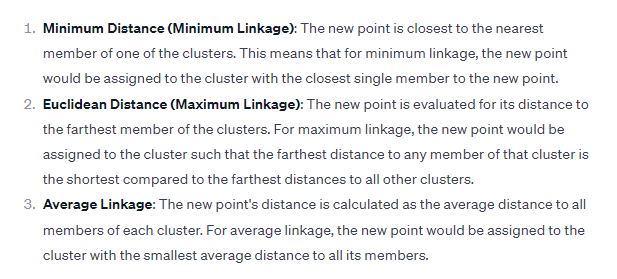

## Mahalanobis distance
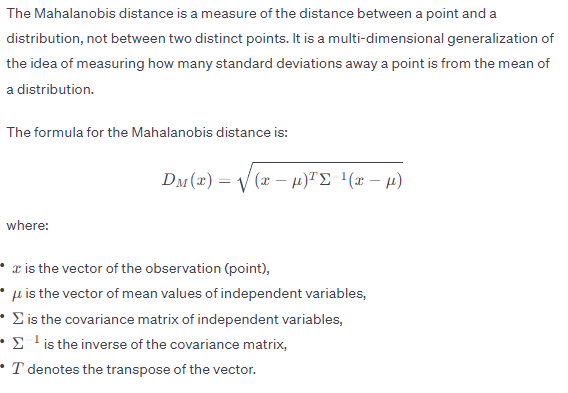
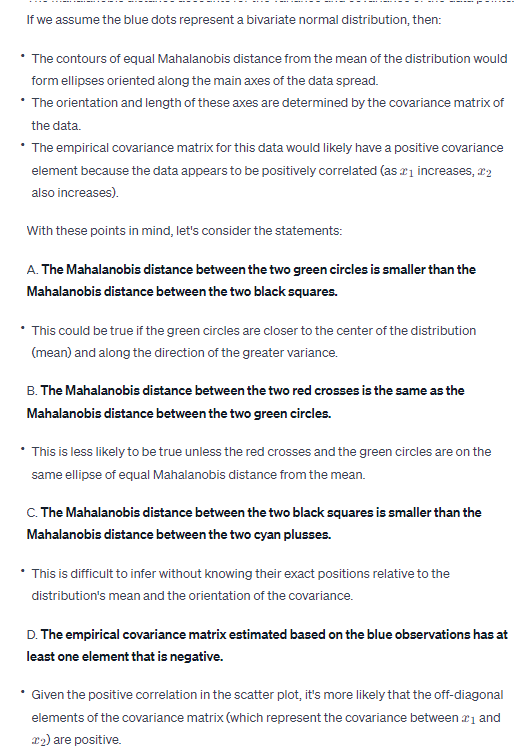

## Q24: Probability density function
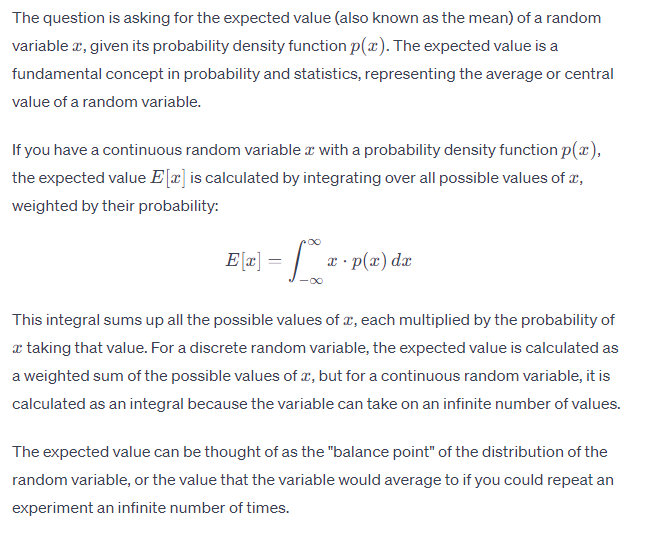

In [22]:
# Define the bounds
bounds = [(0, 0.2), (0.2, 0.6), (0.6, 0.9)]

# Define the function values in the intervals
function_values = [0.6, 1, 1.6]

# Calculate the expected value using the formula for the integral of x
E_x = sum([f_val * 0.5 * (upper**2 - lower**2) for (lower, upper), f_val in zip(bounds, function_values)])

E_x  # This will output 0.532


0.532

## Q25: Cosine similarity, d norm / p norm calculation
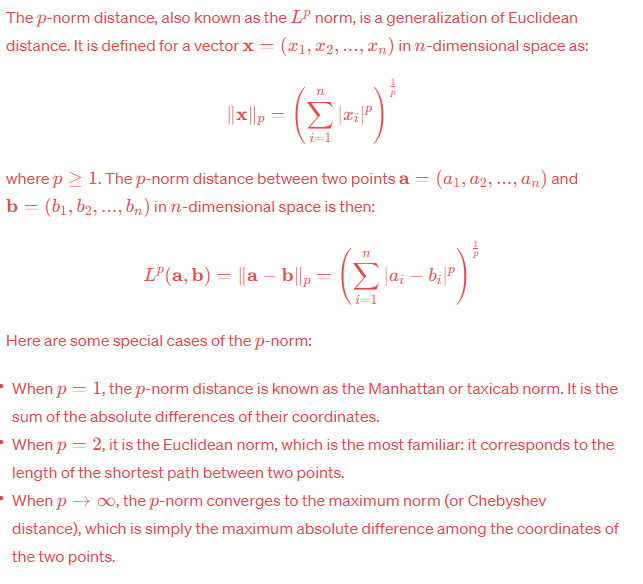

In [30]:
from scipy.spatial.distance import cosine, jaccard
from scipy.spatial.distance import minkowski

# Binary vectors for each observation
o1 = [-1.24, -0.26, -1.04]
o2 = [-0.60, -0.86, -0.5]

# o1 to o4 taken as per problem, see what you problem asks for

# Compute SMC
def smc(a, b):
    return sum(1 for x, y in zip(a, b) if x == y) / len(a)

# Compute Cosine Similarity
def cos_sim(a, b):
    return 1 - cosine(a, b)

# Compute Jaccard Index
def jaccard_index(a, b):
    return 1 - jaccard(a, b)

# Calculate similarities
# smc_o2_o4 = smc(o2, o4)
cos_o1_o2 = cos_sim(o1, o2)
# smc_o3_o4 = smc(o3, o4)
j_o2_o4 = jaccard_index(o1, o2)

# Vectors for each observation
o1 = [-1.24, -0.26, -1.04]
o2 = [-0.60, -0.86, -0.5]

# Compute p-norm distance, for p=2, this is equivalent to Manhattan distance
p_norm_distance_p1 = minkowski(o1, o2, p=1)

print(p_norm_distance_p1)

# Compute p-norm distance, for p=4
p_norm_distance_p4 = minkowski(o1, o2, p=4)

print(p_norm_distance_p4)

# Compute p-norm distance with p=infinity, which is equivalent to Chebyshev distance
p_norm_distance_infinity = minkowski(o1, o2, p=float('inf'))

print(p_norm_distance_infinity)


# print(f"SMC(o2, o4): {smc_o2_o4:.3f}")
print(f"Cos(o1, o2): {cos_o1_o2:.3f}")
# print(f"SMC(o3, o4): {smc_o3_o4:.3f}")
# print(f"J(o2, o4): {j_o2_o4:.3f}")


1.78
0.7863759868045784
0.64
Cos(o1, o2): 0.781


## Q25: Machine Learning Theory related - Test/Train error, training data, k-fold cross validation

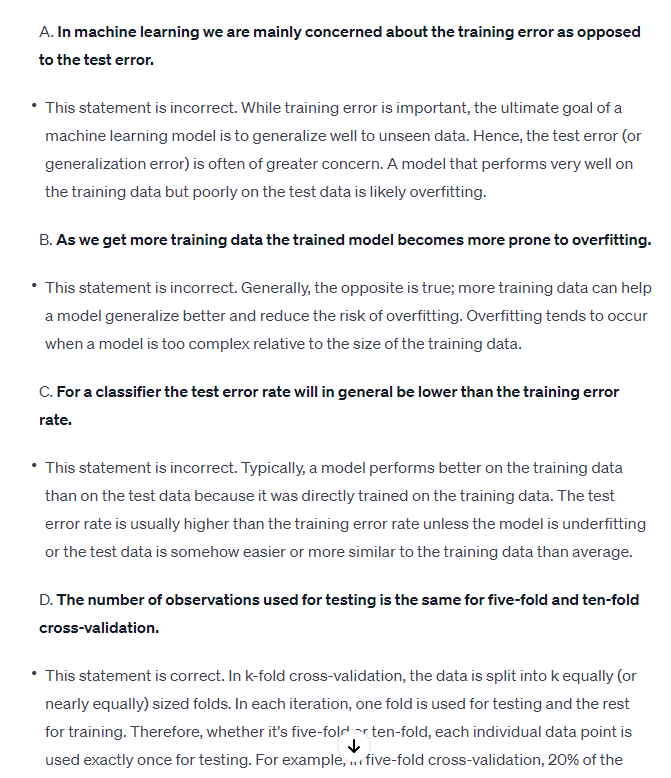

## ADA Boost + KNN classifier prediction
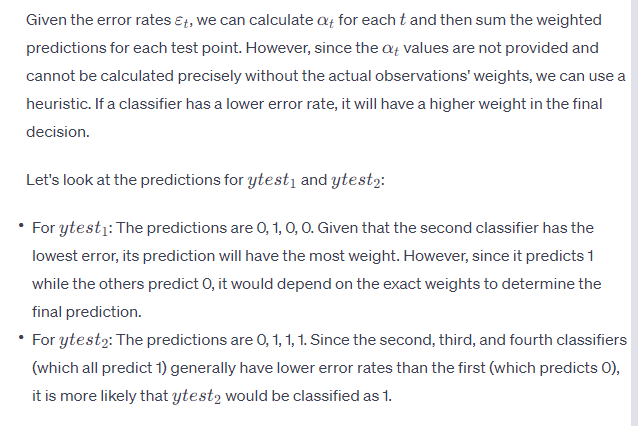
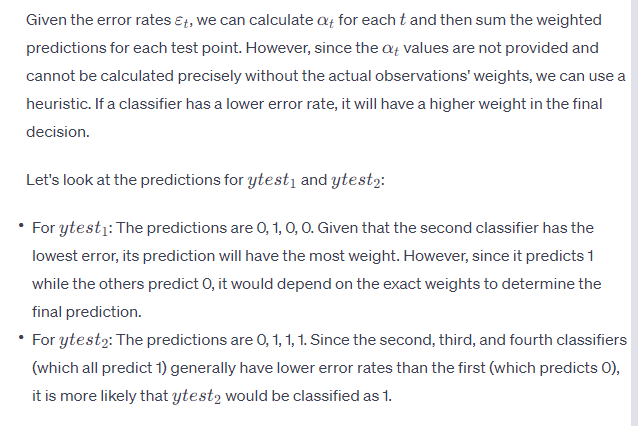

In [31]:
import numpy as np

# Error rates for each classifier
error_rates = np.array([0.417, 0.243, 0.307, 0.534])

# Calculate alpha_t for each classifier
alpha_t = 0.5 * np.log((1 - error_rates) / error_rates)

# Predictions for ytest1 and ytest2 by each classifier
predictions_ytest1 = np.array([0, 1, 0, 0])
predictions_ytest2 = np.array([0, 1, 1, 1])

# Calculate the final weighted votes for ytest1 and ytest2
weighted_vote_ytest1 = np.sum(alpha_t * (2 * predictions_ytest1 - 1))
weighted_vote_ytest2 = np.sum(alpha_t * (2 * predictions_ytest2 - 1))

# Determine the final classification based on the sign of the weighted vote
final_classification_ytest1 = int(weighted_vote_ytest1 > 0)
final_classification_ytest2 = int(weighted_vote_ytest2 > 0)

(alpha_t, final_classification_ytest1, final_classification_ytest2)


(array([ 0.16755048,  0.56815091,  0.40709113, -0.0681051 ]), 1, 1)

## Q10:  Normal Probability density fucntion - Number of computations - Naive Bayes

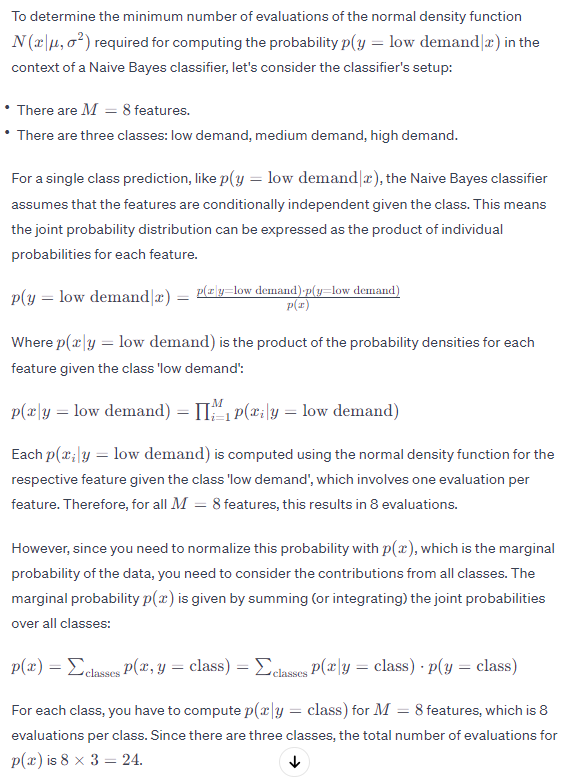